In [1]:
# 기본패키지 
import numpy as np
import pandas as pd 
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

#한글설정/차트 마이너스 깨짐현상 해결/ seaborn 화면설정 
from matplotlib import rc
import matplotlib.font_manager as fm 
plt.rc('font',family='D2Coding')
sns.set(font='D2Coding', rc= {'axes.unicode_minus':False}, style='darkgrid' )


In [3]:

# 머신러닝 패키지 import
import statsmodels.api as sm 
import sklearn as sk

In [4]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

농어 길이와 무게간 상관관계 확인

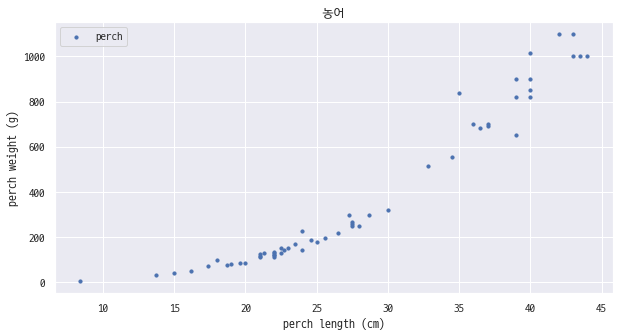

In [5]:
plt.figure(figsize=(10,5))
plt.scatter(perch_length, perch_weight, s=10, c='b', marker='o', label='perch')
plt.xlabel('perch length (cm)')
plt.ylabel('perch weight (g)')
plt.title('농어')
plt.legend()




plt.show()


#### 훈련세트, 테스트세트 분리

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [7]:
# 훈련 세트는 2차원 배열이어야 하는데 얘는 1차원이네...?
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [8]:
train_input.shape

(42,)

In [9]:
train_input.reshape(-1, 1)

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [10]:
np.column_stack((train_target))


array([[  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
         120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
         265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
         840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
          80.,  700.,  120.,  197., 1100.,  556.]])

In [11]:
np.column_stack((train_input))
train_input.shape

(42,)

In [12]:
np.column_stack((test_input))
test_input.shape

(14,)

In [13]:
temp = np.column_stack((train_input))

In [14]:
new_train_input = temp.reshape(-1, 1)

In [15]:
new_test_input = np.column_stack((test_input))

In [16]:
train_input.reshape(-1, 1) # 2차원으로 행렬 차원 전환
train_input.shape

(42,)

In [17]:
new_test_input = np.row_stack((test_input))
new_test_input.shape

(14, 1)

In [18]:
print(new_test_input.shape, new_train_input.shape)

(14, 1) (42, 1)


### 결정계수($R^2$) 계산
* Tex  문법

In [19]:
from sklearn.neighbors import KNeighborsRegressor


In [20]:
knr = KNeighborsRegressor()
# KNN 후ㅡㄴ련시 훈련세트는 반드시 2차원배열
knr.fit(new_train_input, train_target)

KNeighborsRegressor()

In [21]:
knr.score(new_test_input, test_target)
#테스트 시에도 X는 여전히 2차원배열
# 정확도 0.9928 - 결정계수라고 부름 Coefficient of determination

0.992809406101064

### MAE - Mean Absolute Error



In [22]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듬

test_pred = knr.predict(new_test_input)


In [23]:
new_test_input
# 테스트 할 농어의 길이 리스트

array([[ 8.4],
       [18. ],
       [27.5],
       [21.3],
       [22.5],
       [40. ],
       [30. ],
       [24.6],
       [39. ],
       [21. ],
       [43.5],
       [16.2],
       [28. ],
       [27.3]])

In [24]:
#실제 측정된 농어 무게 리스트
test_target

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [25]:
#예측된 무게 리스트

test_pred


array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [26]:
# 테스트 타겟 세트에 대한 평균 절대값 오차를 계산 (MAE)
# mae = mean_absolute_error(test_target, test_pred)
mae = mean_absolute_error(y_true = test_target, y_pred = test_pred)
mae

19.157142857142862

결과에서 예측이 타깃값과 비교해서 평균 19.15g 이상 차이가 난다는 소리

#### 과소적합 (underfitting)
훈련세트보다 테스트세트의 테스트 결과가 좋다는 소리(결정력이 더 좋을 경우) or 훈련세트와 테스트세트의 결정계수 값이 모두 낮은 경우

In [27]:
knr.score(new_test_input, test_target)

0.992809406101064

In [28]:
#테스트로 결정계수
knr.score(new_train_input, train_target)

0.9698823289099254

#### 과대 적합 overfitting

 - 훈련세트로 학습한 모델의 결정계수가 높으나 테스트세트에서 나온 결정계수가 매우 나쁠 때
 

In [29]:
knr.n_neighbors = 3 #(원래는 3이지?)


#재훈련
knr.fit(new_train_input, train_target)
knr.score(new_test_input, test_target)

0.9746459963987609

In [30]:
knr.score(new_train_input, train_target)

0.9804899950518966

In [31]:
## 확인문제

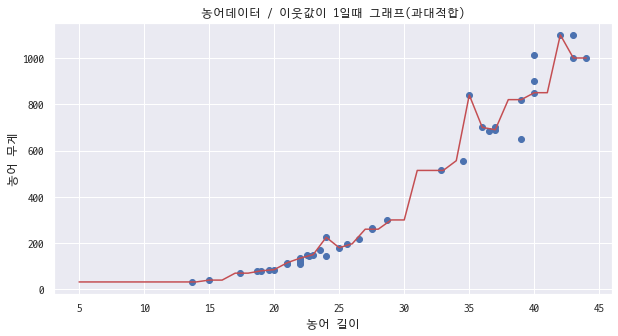

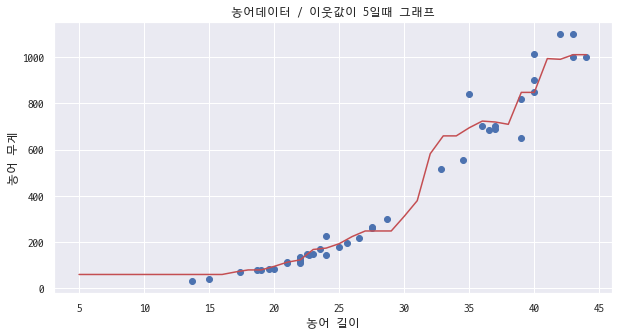

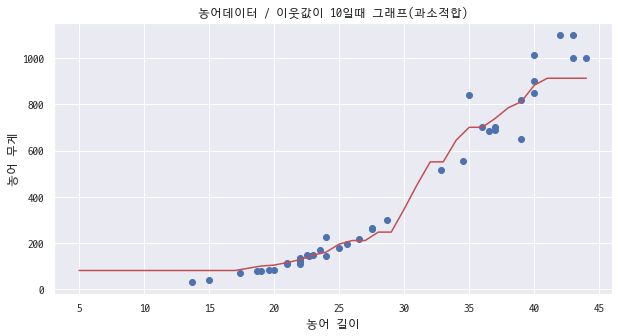

In [35]:
# KNN 회귀 객채 만들기
knr = KNeighborsRegressor()
# 5 ~ 45 사이의 값으로 설정 

x = np.arange(5,45).reshape(-1, 1)
x

# k 이웃값을 1,5,10으로 변경하면서 예측하고 차트 그리기

for n in [1,5,10]: # randomstate 42 입력
    knr.n_neighbors = n
    knr.fit(new_train_input, train_target)

    # x에 대한 예측 도출
    pred = knr.predict(X=x)
    # 훈련세트와 예측 결과를 산점도로 그리기
    plt.figure(figsize=(10,5))
    plt.scatter(new_train_input, train_target)
    plt.plot(x, pred, c='r')
    title = f'농어데이터 / 이웃값이 {n}일때 그래프'
    if n == 1:
        title += '(과대적합)'
    elif n == 10:
        title += '(과소적합)'
    plt.title(title)
#14:55:00

    plt.xlabel('농어 길이')
    plt.ylabel('농어 무게')
    plt.show()


# # KNN 회귀 객체를 만듦
# knr = KNeighborsRegressor()
# # 5~45까지 x좌표를 생성
# x = np.arange(5,45).reshape(-1,1)

# # k-이웃값을 1, 5, 10으로 변경하면서 예측을하고 차트그리기
# for n in [1, 3, 10, 42]: # randomstate 42 입력
#     knr.n_neighbors = n
#     knr.fit(X=new_train_input, y=train_target)
    
#     # x에 대한 예측 도출
#     pred = knr.predict(X=x)
#     # 훈련 세트와 예측 결과를 산점도에 표시
#     plt.figure(figsize=(10,5))
#     plt.scatter(x=new_train_input, y=train_target)
#     plt.plot(x, pred, color='orange', linewidth='3.0')
#     title = f'농어데이터 / 이웃값이 {n}일때 그래프'
#     if n == 1:
#         title += ' (과대적합)'
#     elif n == 10:
#         title += ' (과소적합)'
#     plt.title(title)
#     plt.xlabel('길이(cm)')
#     plt.ylabel('무게(g)')
#     plt.show()